## Keras Classification on the Wine Data Set

This notebook uses a data set uploaded to Google drive from a local computer. The following code block, when uncommented, will upload the selected file.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving wine_all.csv to wine_all.csv


In [2]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['wine_all.csv']))
df.type = df.type.astype('category').cat.codes
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


# Train/Test split

In [3]:
# train test split
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:12]
y = df.type

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5197, 12)
Test shape: (1300, 12)



Scale the data

In [0]:
# scale the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Logistic Regression

The logistic regrssion model gets an accuracy of 99%, which will be hard to beat.

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred = clf.predict(X_test)

In [7]:
# evaluate
from sklearn.metrics import accuracy_score, confusion_matrix

print('accuracy score: ', accuracy_score(y_test, pred))
confusion_matrix(y_test, pred)

accuracy score:  0.9938461538461538


array([[308,   3],
       [  5, 984]])

Now try Keras

In [9]:
import keras

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

Using TensorFlow backend.


In [0]:
from __future__ import print_function

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
epochs = 20

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(12,)))
model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 5197 samples, validate on 1300 samples
Epoch 1/20
5197/5197 [==============================] - 0s 86us/step - loss: 0.2632 - accuracy: 0.9622 - val_loss: 0.0909 - val_accuracy: 0.9896
Epoch 2/20
5197/5197 [==============================] - 0s 27us/step - loss: 0.0647 - accuracy: 0.9904 - val_loss: 0.0341 - val_accuracy: 0.9923
Epoch 3/20
5197/5197 [==============================] - 0s 23us/step - loss: 0.0383 - accuracy: 0.9930 - val_loss: 0.0236 - val_accuracy: 0.9931
Epoch 4/20
5197/5197 [==============================] - 0s 24us/step - loss: 0.0308 - accuracy: 0.9947 - val_loss: 0.0195 - val_accuracy: 0.9938
Epoch 5/20
5197/5197 [==============================] - 0s 26us/step - loss: 0.0280 - accuracy: 0.9954 - val_loss: 0.0184 - val_accuracy: 0.9931
Epoch 6/20
5197/5197 [==============================] - 0s 26us/step - loss: 0.0258 - accuracy: 0.9953 - val_loss: 0.0201 - val_accuracy: 0.9931
Epoch 7/20
5197/5197 [==============================] - 0s 24us/step - loss: 0.023

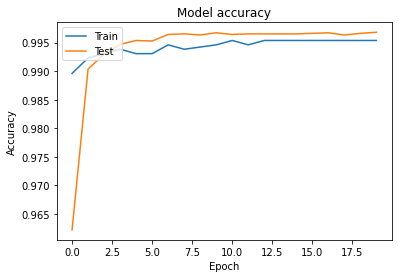

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [13]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.032297258644651335
Test accuracy: 0.9953846335411072


The accuracy of the neural network was the same as for logistic regression, meaning that neural network was something of an overkill for data that was easily linearly separable. The neural network also took many more lines of code and much more training time. The key take-away is that you don't have to bring the big hammer for a small nail.